In [5]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Parameters
mesh_path  ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path  = None #'~/figures/test_papermill/'
save_fname = None

#_____________________________________________________________________________________
which_cycl = 1
which_mode = 'variable'

#_____________________________________________________________________________________
input_paths= list()
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.3/')

input_names= list()
input_names.append('TKE, ck=0.1')
input_names.append('TKE, ck=0.3')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (old param)')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, nycander (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, stormtide (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, jayne (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, nycander (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, stormtide (new param)')

vname      = 'temp'
year       = [1979,2019]
mon, day, record, box, depth = None, None, None, None, 100

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None #'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
which_clim = 'phc3'
clim_path  = '/work/ollie/pscholz/INIT_HYDRO/phc3.0/phc3.0_annual.nc'

#_____________________________________________________________________________________
cstr       = 'blue2red'
cnum       = 20
cref       = 0
crange, cmin, cmax, cfac, climit = None, None, None, None, None

#_____________________________________________________________________________________
ncolumn    = 3 
do_rescale = None
which_dpi  = 300
proj       = 'pc'

In [7]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

#______________________________________________________________________________________________________
if which_cycl is not None: 
    for ii,ipath in enumerate(input_paths):
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, ipath, input_paths[ii])

    if ref_path is not None:
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)        

#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum})     
if crange is not None: cinfo['crange']=crange
if cmin   is not None: cinfo['cmin'  ]=cmin
if cmax   is not None: cinfo['cmax'  ]=cmax
if cref   is not None: cinfo['cref'  ]=cref
if cfac   is not None: cinfo['cfac'  ]=cfac
if climit is not None: cinfo['climit']=climit
if ref_path is not None: cinfo['cref'  ]=0.0    
    
#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record    

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
0 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/ /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/3/
1 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/ /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/3/
2 /home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/ /home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/3/
3 /home/ollie/pscholz/results/trr181_tke

In [9]:
#___LOAD Climatology DATA______________________________________________________________________________
clim_vname = vname
if (vname in ['temp', 'salt', 'pdens'] or 'sigma' in vname) and (depth is not 'bottom'): 
    if   vname=='temp' and  which_clim.lower()=='woa18': clim_vname = 't00an1'
    elif vname=='salt' and  which_clim.lower()=='woa18': clim_vname = 's00an1'
    clim = tpv.load_climatology(mesh, clim_path, clim_vname, depth=depth)
else: raise ValueError('climatology not supported for choosen vname')    

#___LOAD FESOM2 REFERENCE DATA________________________________________________________________________
data_list = list()
if ref_path is not None:
    print(ref_path)
    data_ref = tpv.load_data_fesom2(mesh, ref_path, vname=vname, year=ref_year, mon=ref_mon, day=ref_day, record=ref_record, 
                                    depth=depth, descript=ref_name, do_info=False) 
    data_list.append(tpv.do_anomaly(data_ref, clim))
    del data_ref

#___LOAD FESOM2 DATA___________________________________________________________________________________
for datapath,descript in zip(input_paths, input_names): 
    print(datapath)
    data = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, day=day, record=record, 
                                depth=depth, descript=descript, do_info=False)
    data_list.append(tpv.do_anomaly(data, clim))
    del data

/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/3/
/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/3/
/home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/3/
/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/3/
/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.1/3/
/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.1/3/
/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/3/
/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.3/3/
/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.3/3/


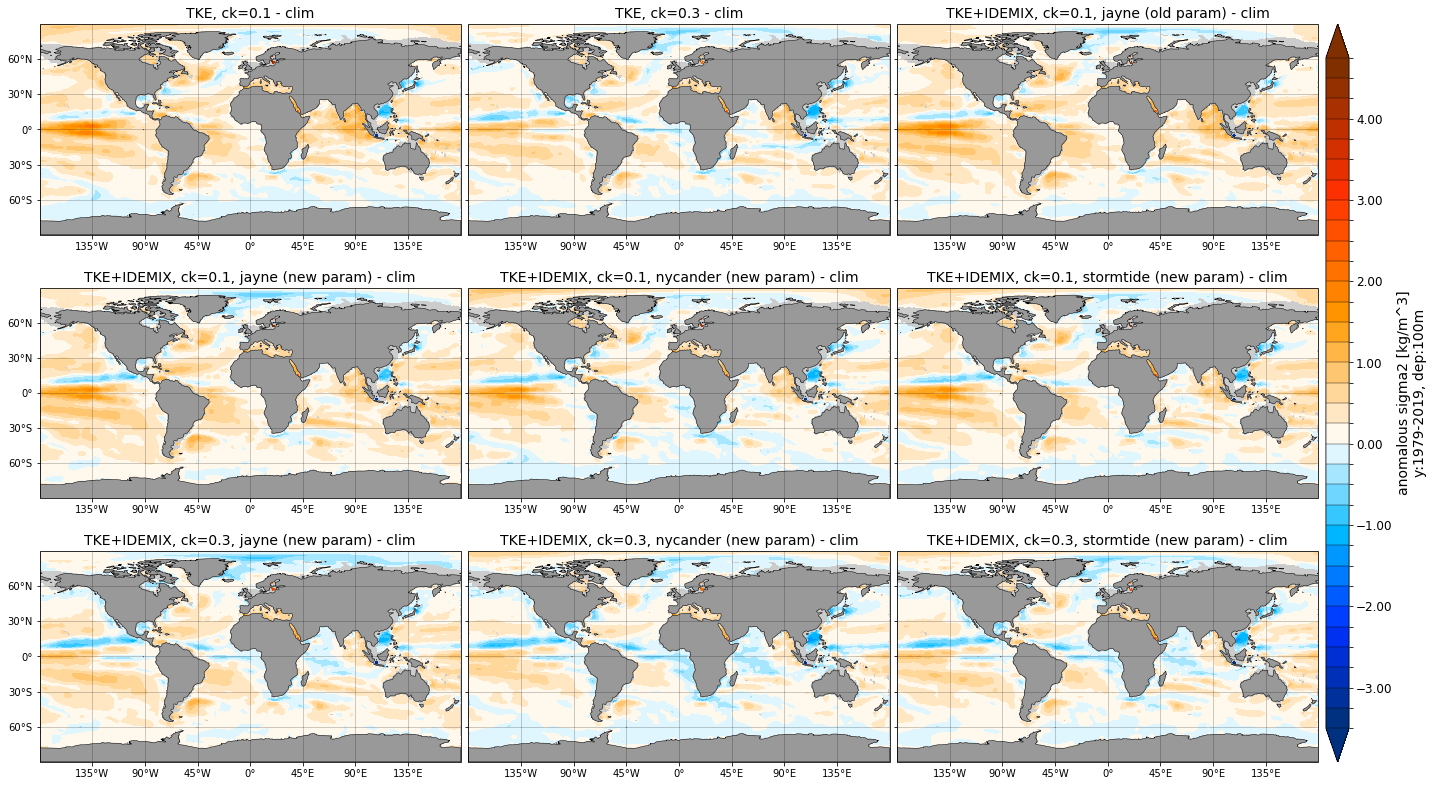

In [10]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = data_list[0][sname].attrs['str_lsave']
if spath is not None: spath = os.path.join(spath,'{}_{}_{}.png'.format(which_mode, sname, slabel)) 
nrow   = np.ceil(len(data_list)/ncolumn).astype('int')
if save_fname is not None: spath = save_fname
# pos_gap = [0.005, 0.01]
pos_gap = [0.005, 0.04]
if proj in ['nps, sps']:pos_gap = [0.005, 0.035] 

fig, ax, cbar = tpv.plot_hslice(mesh, data_list, cinfo=cinfo, box=box, n_rc=[nrow, ncolumn], 
                            figsize=[ncolumn*7, nrow*3.5], proj = proj, 
                            do_lsmask='fesom', do_rescale=do_rescale, title='descript', 
                            pos_gap=pos_gap, pos_extend=[0.03, 0.03, 0.905, 0.975], 
                            do_save=spath, save_dpi=which_dpi)